# **Rutherford Scattering (short project for PHYS 1113)** 
### Coded by WANG, Xuechi
### Analysed by LUO, Yueyang

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tqdm

In [2]:
from scipy import constants

## Initialize some constants

In [3]:
Z1 = 2  # Atomic number of alpha particle
Z2 = 79  # Atomic number of gold nucleus
e = constants.e  # Elementary charge (C)
epsilon_0 = constants.epsilon_0  # Permittivity of free space (F/m)
(m, _, _) = constants.physical_constants['alpha particle mass']  # Mass of alpha particle (kg)
k = 10  # Initial distance in X direction (sufficiently large)
pi = constants.pi

## Set initial condition 

In [4]:
b = 2  # Impact parameter (can be varied)
X_0 = -k
Y_0 = b
V_X0 = 1.0
V_Y0 = 0.0
delta_tau = 0.001

In [5]:
V_X = np.array([V_X0])
V_Y = np.array([V_Y0])
X = np.array([X_0])
Y = np.array([Y_0])

## Calculate motion by iteration

### The following code may not use in the real experiment due to performance issue (np.append) but it's ok for small stimulation

In [39]:
def cal_X_Y(b):
    X_0 = -k
    Y_0 = b
    V_X0 = 1.0
    V_Y0 = 0.0
    delta_tau = 0.001
    V_X = np.array([V_X0])
    V_Y = np.array([V_Y0])
    X = np.array([X_0])
    Y = np.array([Y_0])
    while (np.sqrt(X[-1]**2 + Y[-1]**2) < 18): # R < 12
        X = np.append(X, X[-1] + delta_tau * V_X[-1])
        Y = np.append(Y, Y[-1] + delta_tau * V_Y[-1])
        A_X = X[-1]/(2*(np.sqrt(X[-1]**2 + Y[-1]**2)**3))
        A_Y = Y[-1]/(2*(np.sqrt(X[-1]**2 + Y[-1]**2)**3))
        V_X = np.append(V_X, V_X[-1] + delta_tau * A_X)
        V_Y = np.append(V_Y, V_Y[-1] + delta_tau * A_Y)
    return (X, Y, V_X, V_Y)

## Plot figures of particle motion

0.1
0.25
0.5
1
2


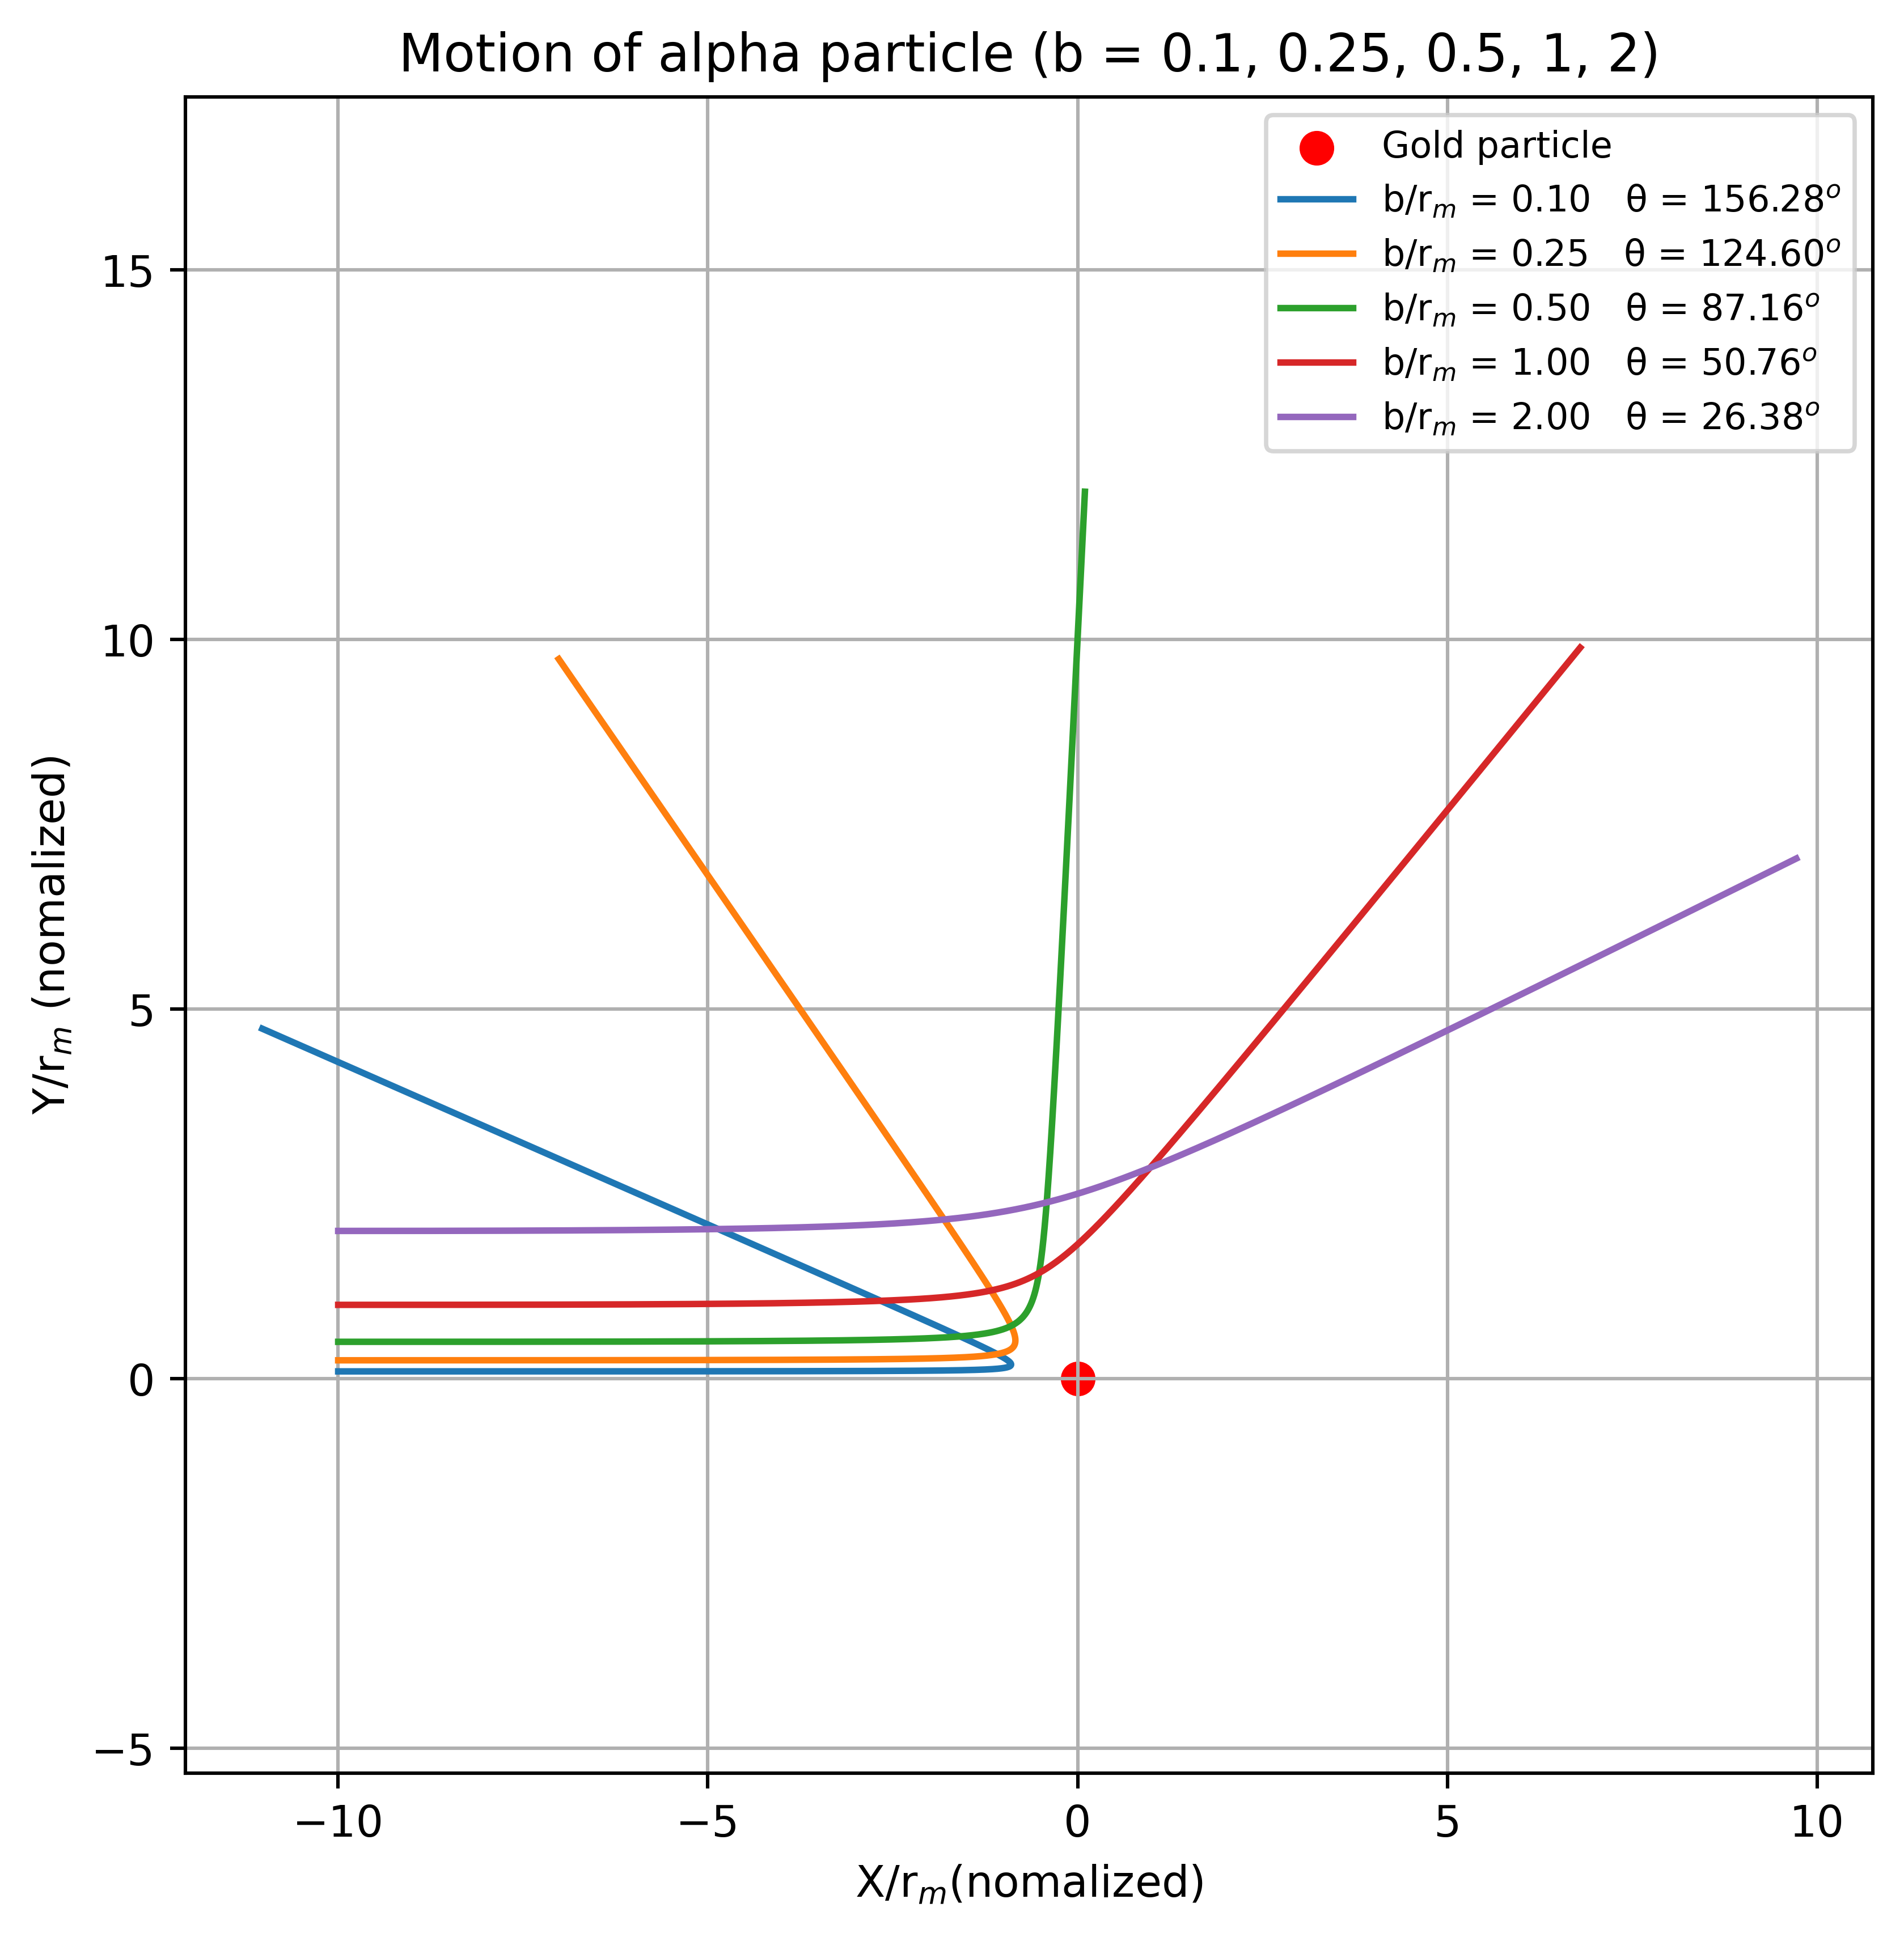

In [7]:
plt.figure(figsize=(38.4/5.5, 38.4/5.5), dpi=550)
plt.scatter([0], [0], marker='o', linewidths=2, label='Gold particle', c='r')
plt.axis('equal')
plt.grid()
plt.title(f"Motion of alpha particle (b = 0.1, 0.25, 0.5, 1, 2)")
for i in [0.1,0.25,0.5,1,2]:
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    theta = np.arctan(V_Y[-1] / V_X[-1])
    if theta < 0:
        theta = np.pi - np.abs(theta)
    plt.plot(X, Y, label='b/r$_m$ = {:.2f}   '.format(i) + 'θ = {:.2f}$^o$'.format(theta*180/pi))
    print(i)
plt.xlabel("X/r$_m$(nomalized)")
plt.ylabel("Y/r$_m$ (nomalized)")
plt.legend(fontsize="small")

## Plot $\ \ \tan \dfrac{θ}{2} \ \ against \ \ \dfrac{1}{b} /(\dfrac{1}{r_m})$

###  <center>$\large $ We changed the unit of b to $ \dfrac{1}{r_m}$ so the slope of fitting line is a constant which is $ \dfrac{1}{2} \quad \hat k = \dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 m v_0^2 r_m} = \dfrac{1}{2}$</center>

100%|##################################################################################| 50/50 [01:25<00:00,  1.70s/it]


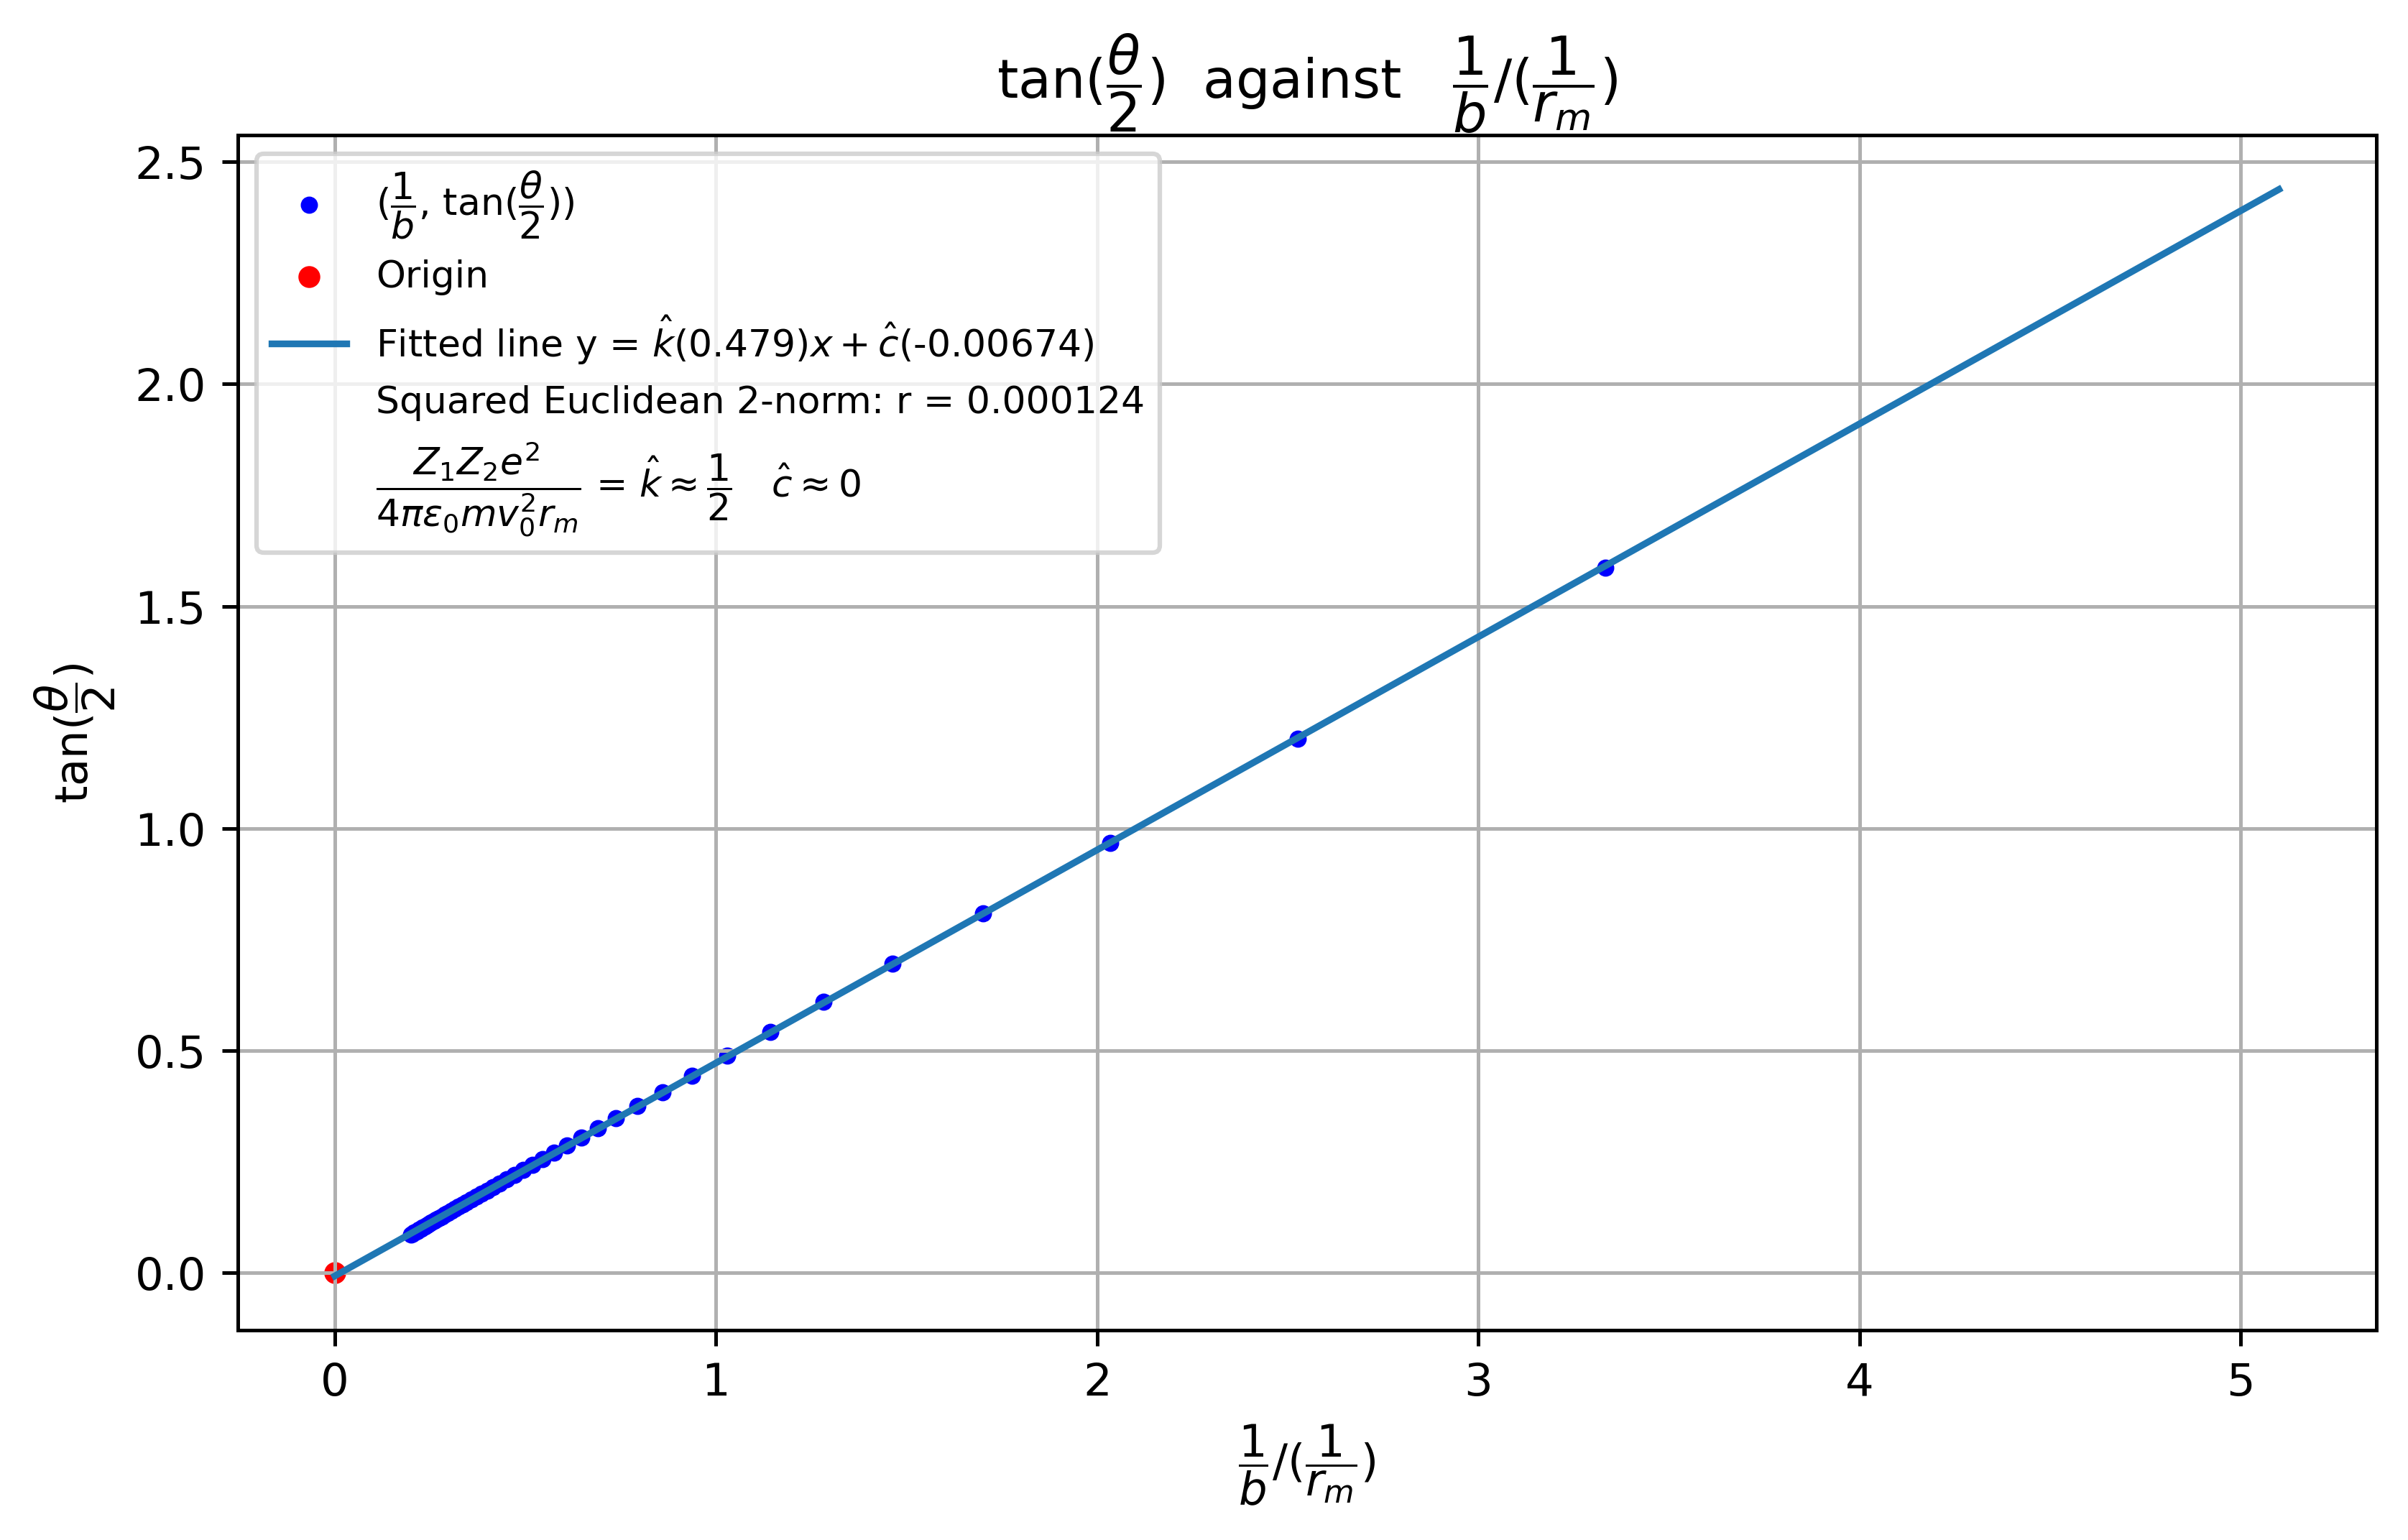

In [8]:
plt.figure(figsize=(38.4/4.5, 21.6/4.5), dpi=450)
plt.xlabel(r"$\dfrac{1}{b} /(\dfrac{1}{r_m})$",)
plt.title("$\\tan(\\dfrac{θ}{2})$  against   $\\dfrac{1}{b}/(\\dfrac{1}{r_m})$")
plt.ylabel(r'$\tan(\dfrac{θ}{2})$')
tan_theta_de_2 = np.array([])
b_devided_1 = np.array([])
for i in tqdm.tqdm(np.linspace(0.3,5,50), ascii=True):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    theta = np.arctan(V_Y[-1] / V_X[-1])
    if theta < 0:
        theta = np.pi - np.abs(theta)
    tan_theta_de_2 = np.append(tan_theta_de_2, np.tan(theta/2))
    b_devided_1 = np.append(b_devided_1, 1/i)
    #plt.scatter(1/i, np.tan(theta/2 - 1e-8), c='b', s=10, label='($\\dfrac{1}{b}$, $tan(\\dfrac{θ}{2})$')
[a, b] = np.linalg.lstsq(np.vstack([b_devided_1 , np.ones(len(b_devided_1))]).T, tan_theta_de_2)[0]
plt.grid()
plt.scatter(b_devided_1, tan_theta_de_2, c='b', s=8, label='($\\dfrac{1}{b}$, $\\tan(\\dfrac{θ}{2}$))')
plt.scatter(0,0, s=15, c='r', label="Origin")
plt.plot(np.linspace(0,5.1, 40), a * np.linspace(0,5.1, 40) + b, label="Fitted line y = $\\hat k(0.479)x + \\hat c$(-0.00674)")
plt.scatter(0,0, label="Squared Euclidean 2-norm: r = 0.000124",c='black',s=0)
plt.scatter(0,0, label="$\\dfrac{Z_1 Z_2 e^2}{4 \\pi \\epsilon_0 m v_0^2 r_m}$ = $  \\hat k \\approx \\dfrac{1}{2} \\quad \\hat c \\approx 0$",c='darkred',s=0)
plt.legend(fontsize='small')

## Least square calculation (to find linear relationship)

## $ mx  +  c   =  y $
### return m (Slope), c (intercept), r (Residual)

In [9]:
np.linalg.lstsq(np.vstack([b_devided_1 , np.ones(len(b_devided_1))]).T, tan_theta_de_2)

(array([ 0.47931386, -0.0067472 ]),
 array([0.00012417]),
 np.int32(2),
 array([8.7231768 , 3.56777856]))

## 

## Verify the conservation of total energy and angular momentum

### $ E = \dfrac{1}{2}(V_X^2  + V^2_Y)  + \dfrac{1}{2  R} $

In [10]:
# Total energy
E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)

In [11]:
# Glance at data of energy
E[0:20] 

array([0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472136,
       0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472136,
       0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472136,
       0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472135])

### $ L = XV_Y  - YV_X = (\vec R \times \dfrac{\vec P}{m}) z$

In [12]:
# Angular momentum
L = X*V_Y-Y*V_X

In [13]:
# Glance at data of angular momentum 
L[0:20]

array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.,
       -5., -5., -5., -5., -5., -5., -5.])

## Further evaluate the Range, Mean Deviation, Standard Deviation, Medium of E and L 

### Range

In [14]:
def cal_range(A): 
    return np.max(A) - np.min(A)

In [15]:
print(f"{' ':^4}"+f"{'b':^6}"+"       "+f"{'Range of E':^12}"+"       "+f"{'Range of L':^12}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_range = cal_range(E)
    l_range = cal_range(L)
    print(f'{i:.4f}       {e_range:e}       {l_range:e}')

      b           Range of E         Range of L 
 1  0.1000       1.784878e-04       4.241052e-14
 2  0.3042       1.570807e-04       4.085621e-14
 3  0.5083       1.285386e-04       6.883383e-15
 4  0.7125       1.028133e-04       4.218847e-14
 5  0.9167       8.239112e-05       6.128431e-14
 6  1.1208       6.677031e-05       3.463896e-14
 7  1.3250       5.486576e-05       2.997602e-14
 8  1.5292       4.571204e-05       4.618528e-14
 9  1.7333       3.857931e-05       1.083578e-13
10  1.9375       3.294126e-05       6.528111e-14
11  2.1417       2.842202e-05       3.330669e-14
12  2.3458       2.475193e-05       4.973799e-14
13  2.5500       2.173541e-05       5.240253e-14
14  2.7542       1.922875e-05       5.906386e-14
15  2.9583       1.712492e-05       5.062617e-14
16  3.1625       1.534312e-05       5.107026e-14
17  3.3667       1.382158e-05       3.597123e-14
18  3.5708       1.251247e-05       5.728751e-14
19  3.7750       1.137838e-05       5.062617e-14
20  3.9792       1.0

### Mean Deviation

In [16]:
def cal_mean_deviation(A): 
    return np.sum(np.abs(A - np.mean(A)))

In [17]:
print(f"{' ':^4}"+f"{'b':^6}"+"         "+f"{'Mean Deviation of E':^0}"+"     "+f"{'Mean Deviation of L'}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_mean_deviation = cal_mean_deviation(E)
    l_mean_deviation = cal_mean_deviation(L)
    print(f'{i:.4f}            {e_mean_deviation:e}            {l_mean_deviation:e}')

      b            Mean Deviation of E     Mean Deviation of L
 1  0.1000            4.978914e-01            2.389738e-10
 2  0.3042            4.569606e-01            1.371497e-10
 3  0.5083            4.006224e-01            2.777334e-11
 4  0.7125            3.469121e-01            8.983947e-11
 5  0.9167            3.011266e-01            1.551100e-10
 6  1.1208            2.632905e-01            1.009788e-10
 7  1.3250            2.321179e-01            9.522916e-11
 8  1.5292            2.062585e-01            2.056466e-10
 9  1.7333            1.845882e-01            4.028620e-10
10  1.9375            1.662367e-01            3.088014e-10
11  2.1417            1.505349e-01            1.008265e-10
12  2.3458            1.369735e-01            1.952327e-10
13  2.5500            1.251587e-01            1.929070e-10
14  2.7542            1.147883e-01            2.146714e-10
15  2.9583            1.056208e-01            1.877849e-10
16  3.1625            9.746669e-02            2.2187

### Standard Deviation

In [18]:
def cal_standard_deviation(A): 
    return np.std(A)

In [19]:
print(f"{' ':^4}"+f"{'b':^6}"+"       "+f"{'STD of E':^12}"+"       "+f"{'STD of L':^12}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_std = cal_standard_deviation(E)
    l_std = cal_standard_deviation(L)
    print(f'{i:.4f}       {e_std:e}       {l_std:e}')

      b            STD of E           STD of L  
 1  0.1000       3.320740e-05       1.194140e-14
 2  0.3042       2.996694e-05       7.959646e-15
 3  0.5083       2.556366e-05       1.515659e-15
 4  0.7125       2.146605e-05       5.906410e-15
 5  0.9167       1.808092e-05       1.183860e-14
 6  1.1208       1.537878e-05       6.196091e-15
 7  1.3250       1.322903e-05       5.641177e-15
 8  1.5292       1.150501e-05       1.175675e-14
 9  1.7333       1.010644e-05       2.438029e-14
10  1.9375       8.957156e-06       1.613814e-14
11  2.1417       8.001361e-06       5.976566e-15
12  2.3458       7.197313e-06       1.043728e-14
13  2.5500       6.513935e-06       1.154586e-14
14  2.7542       5.927313e-06       1.223040e-14
15  2.9583       5.419515e-06       1.120235e-14
16  3.1625       4.976414e-06       1.202829e-14
17  3.3667       4.587130e-06       7.435204e-15
18  3.5708       4.242674e-06       1.124232e-14
19  3.7750       3.936271e-06       1.507648e-14
20  3.9792       3.6

### Medium

In [20]:
def cal_medium(A): 
    return np.median(A)

In [21]:
print(f"{' ':^4}"+f"{'b':^6}"+"        "+f"{'Medium of E':^11}"+"        "+f"{'Medium of L':^11}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_mid = cal_medium(E)
    l_mid = cal_medium(L)
    print(f'{i:.4f}       {e_mid:e}       {l_mid:e}')

      b           Medium of E        Medium of L
 1  0.1000       5.500021e-01       -1.000000e-01
 2  0.3042       5.499815e-01       -3.041667e-01
 3  0.5083       5.499401e-01       -5.083333e-01
 4  0.7125       5.498781e-01       -7.125000e-01
 5  0.9167       5.497958e-01       -9.166667e-01
 6  1.1208       5.496934e-01       -1.120833e+00
 7  1.3250       5.495712e-01       -1.325000e+00
 8  1.5292       5.494299e-01       -1.529167e+00
 9  1.7333       5.492698e-01       -1.733333e+00
10  1.9375       5.490915e-01       -1.937500e+00
11  2.1417       5.488956e-01       -2.141667e+00
12  2.3458       5.486828e-01       -2.345833e+00
13  2.5500       5.484538e-01       -2.550000e+00
14  2.7542       5.482092e-01       -2.754167e+00
15  2.9583       5.479500e-01       -2.958333e+00
16  3.1625       5.476768e-01       -3.162500e+00
17  3.3667       5.473905e-01       -3.366667e+00
18  3.5708       5.470918e-01       -3.570833e+00
19  3.7750       5.467817e-01       -3.775000e+00
2

## Draw the deviation in verifying energy conservation

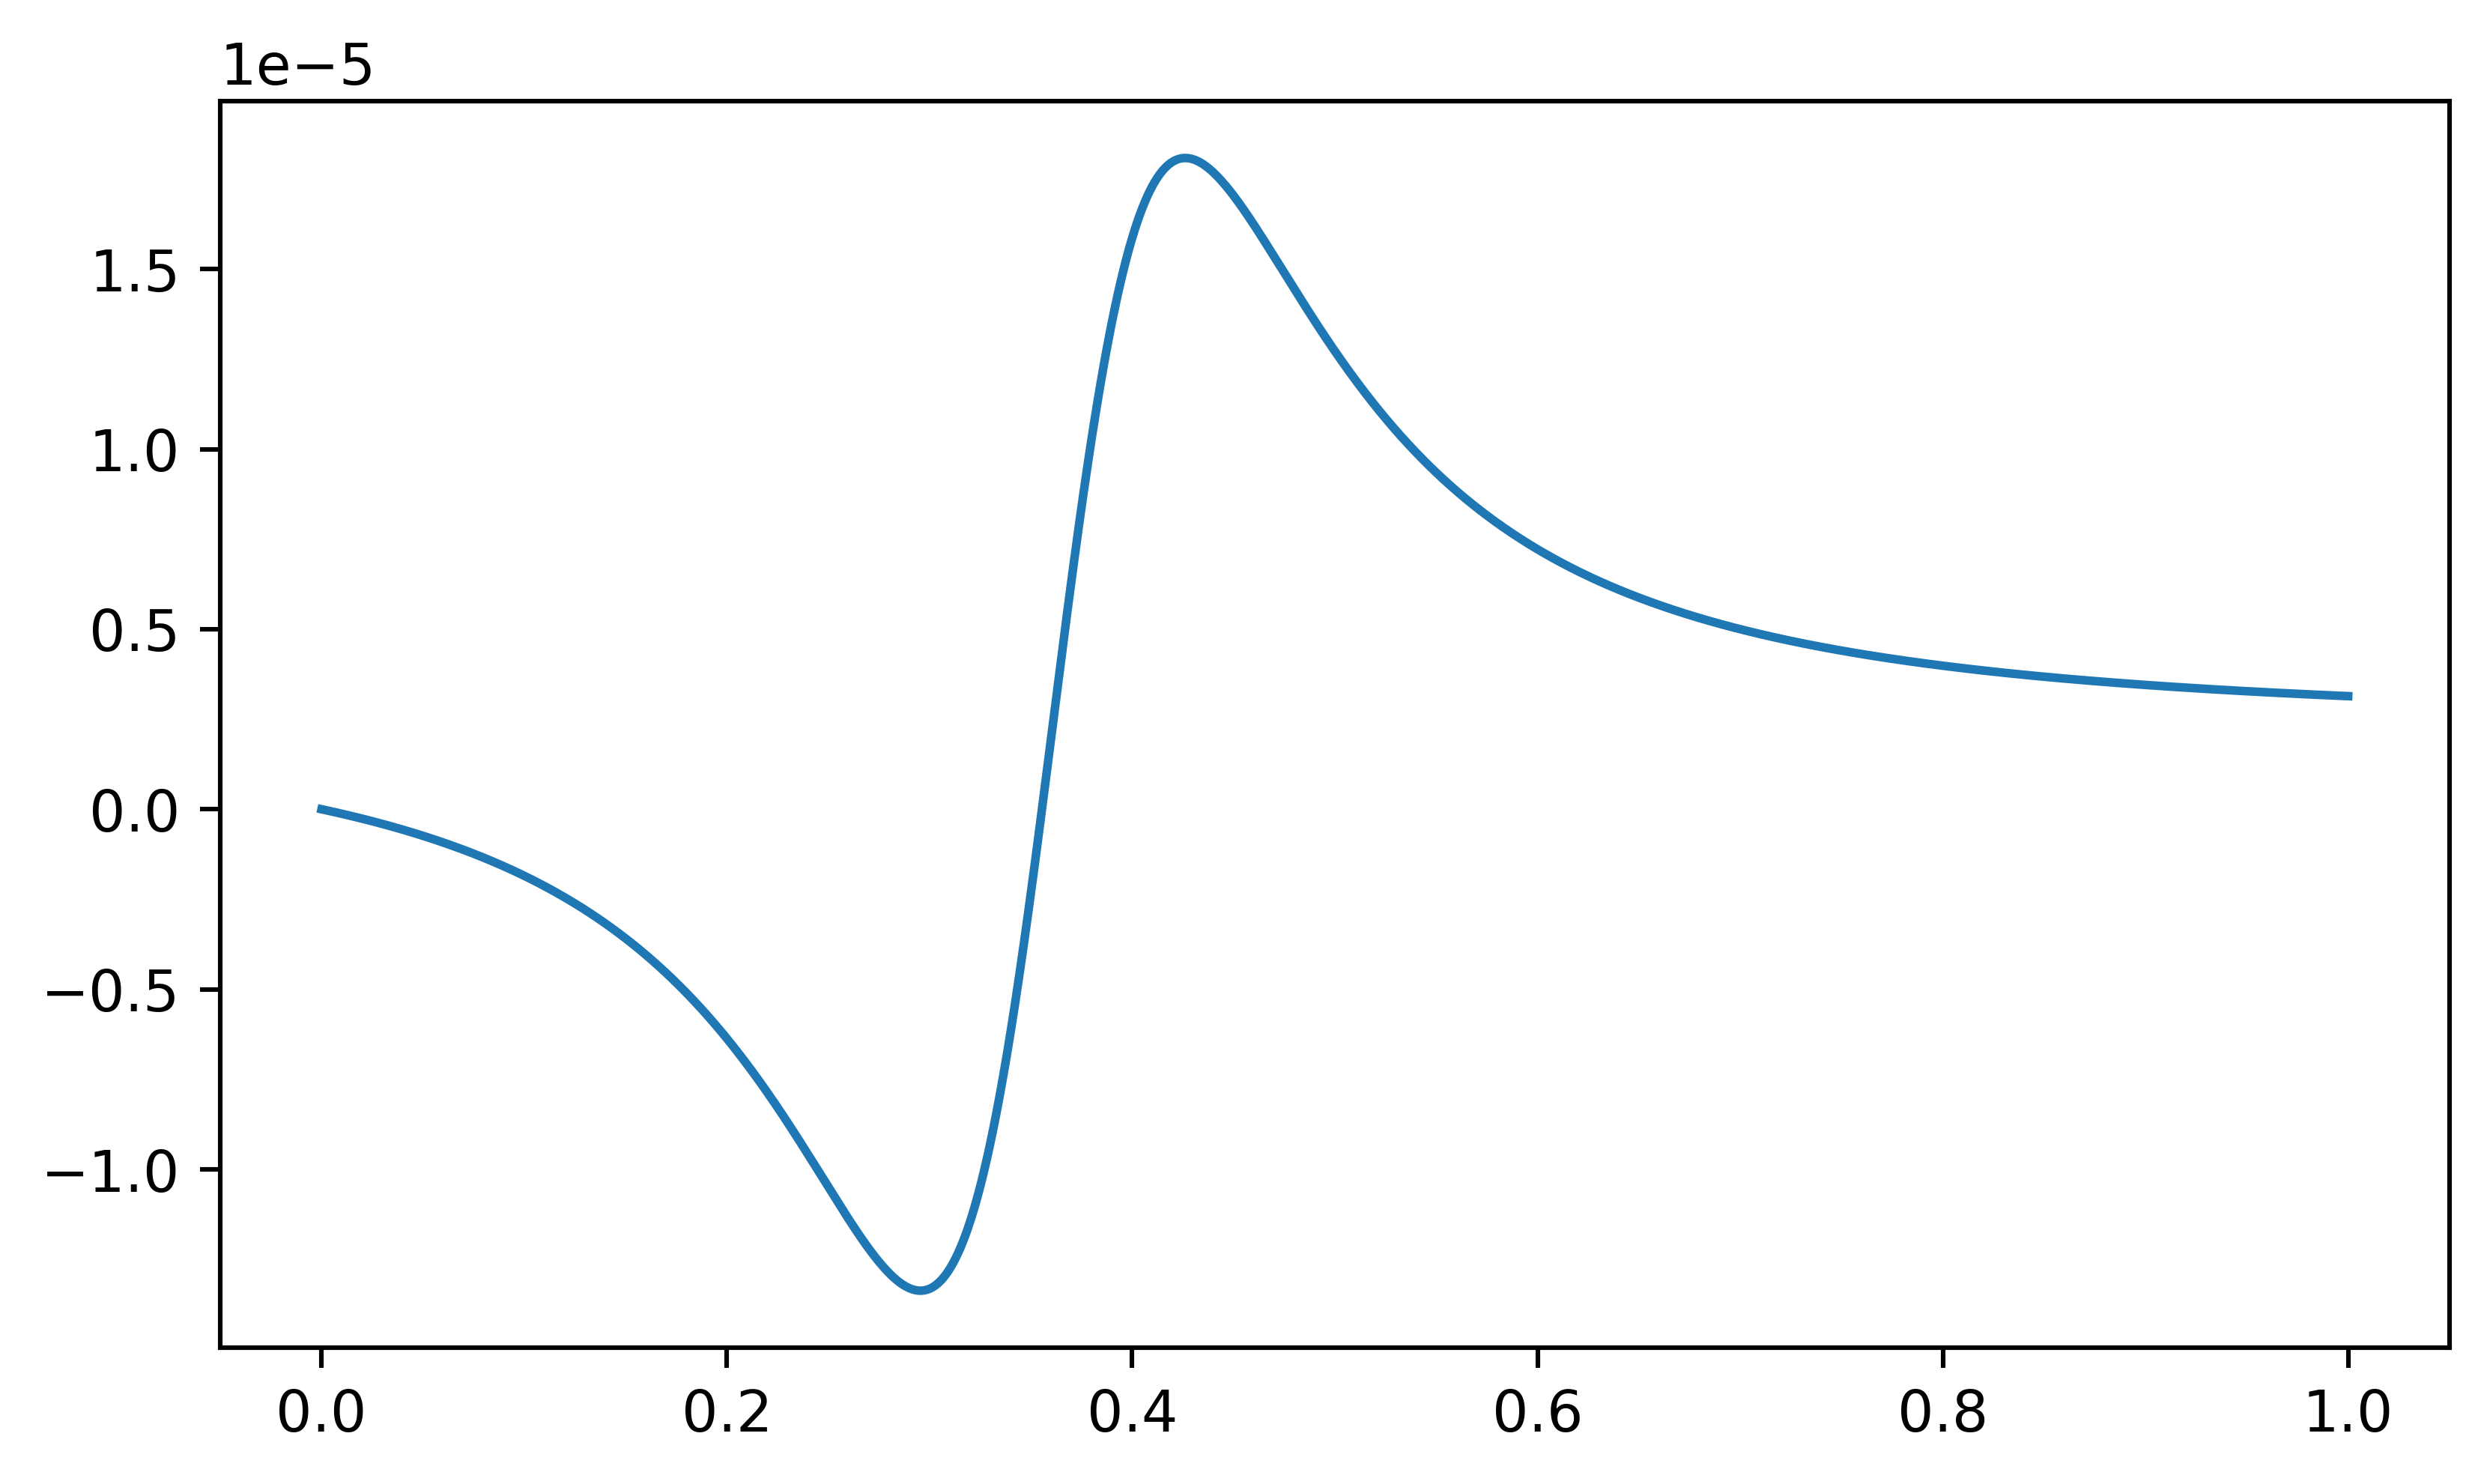

In [42]:
(X, Y, V_X, V_Y) = cal_X_Y(2)
E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
plt.figure(figsize=(38.4/5.5, 21.6/5.5), dpi=550)
plt.plot(np.linspace(0,1,len(E)), E-E[0])

## This makes sense. After talking with Dr. Leung, I concluded that the total session of the alpha particle mothion can be devided into two parts. The first one is the incoming part. In this part, actually, the $r_m \prime < r_m$ so in plain words, "too much" negtive work done by the electronic force. However, in the ongoing session, the situation is opposite to the former one, ${r_m}\prime  > r_m$ which is "Too much" positive work done by the electronic force. So, the total energy will decrease at first, then it will have a recovery. Make sense to the graph.  

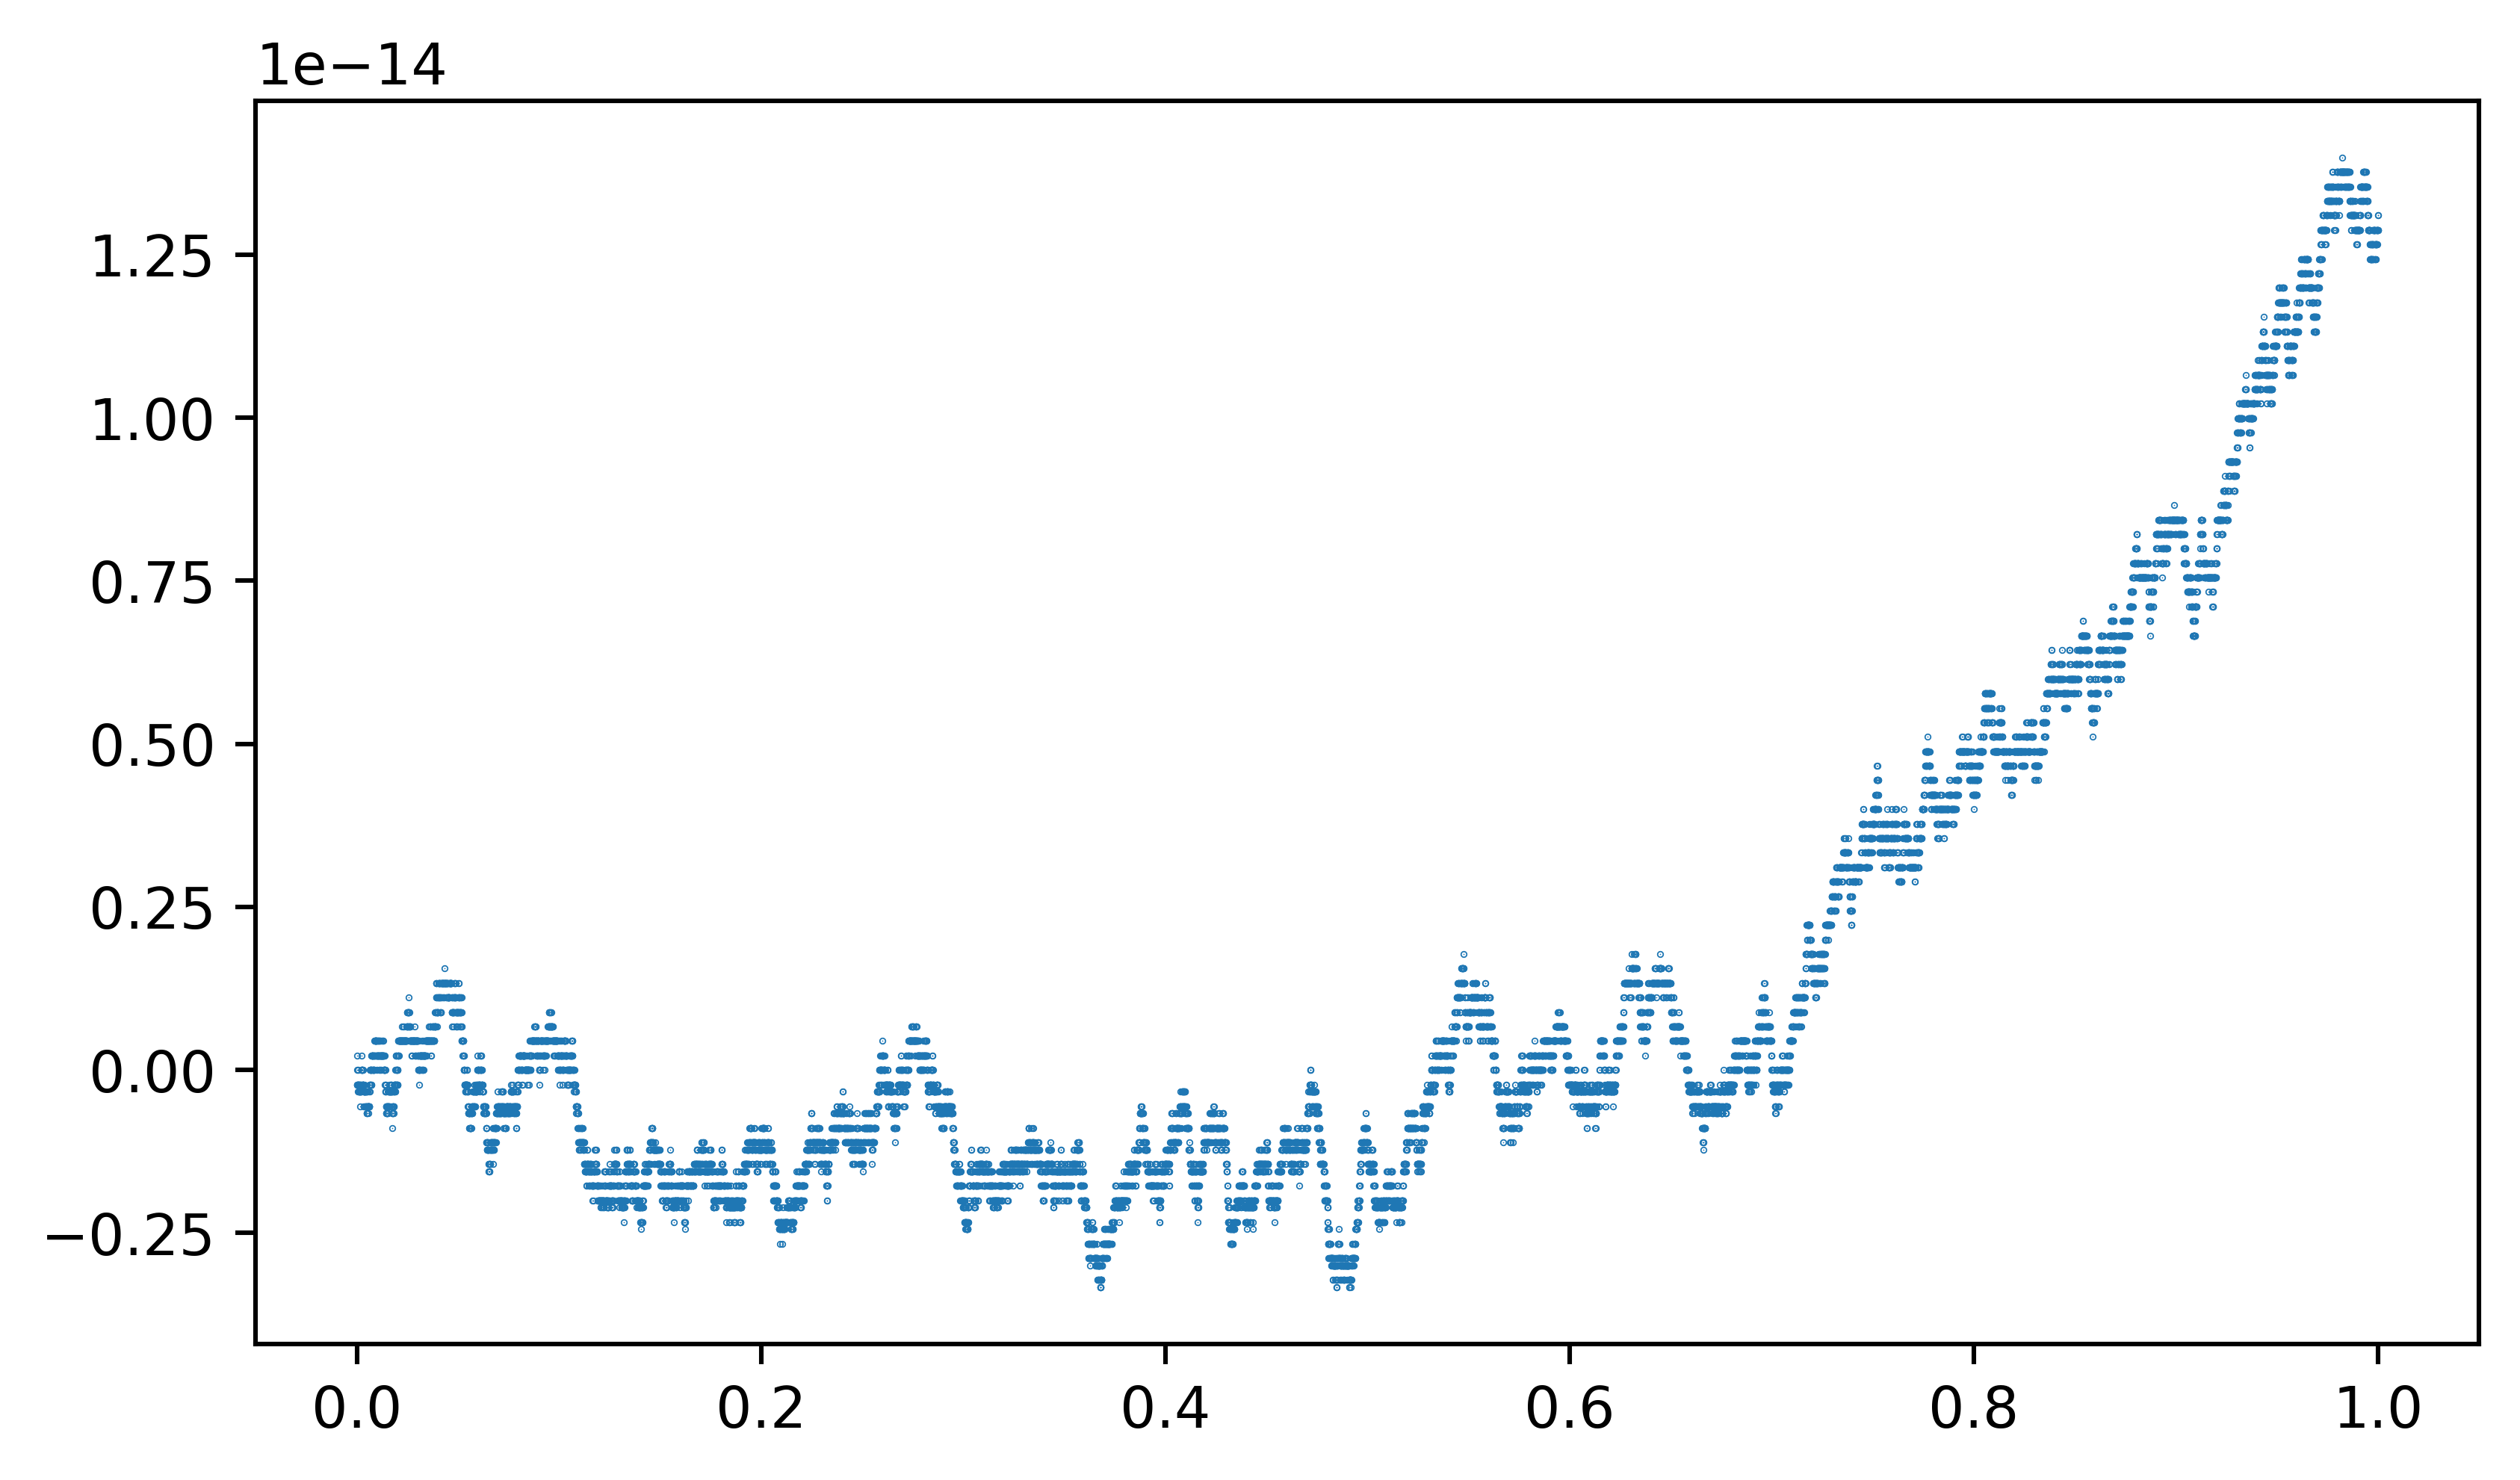

In [44]:
plt.figure(figsize=(38.4/5.5, 21.6/5.5), dpi=550) 
plt.scatter(np.linspace(0,1,len(L)), L/L[0]-1,s=0.05) 

# According Equations

## <center>  $m \dfrac{d^2 \vec r}{dt^2}=\dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 r^2}\hat e_r$ </center>

## <center>  $\hat e_r = \dfrac{\vec r}{r} = \dfrac{x \hat i + y \hat j}{r}$ </center>

## <center>  $\dfrac{1}{2}mv^2_0 = \dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 r_m}\hat e_r$ </center>

## <center>  $v_0 = \dfrac{r_m}{T}$ </center>

## <center>  $T = \sqrt{\dfrac{2 \pi m \epsilon_0 r_m^3}{Z_1 Z_2 e^2}}$ </center>

## <center>  $t=T \tau \quad \vec r = r_m \vec R$ </center>

## <center>  $\dfrac{d^2 \vec R}{d \tau^2} = \dfrac{1}{2R^2}\hat e_r$ </center>

## <center>  $A_X = \dfrac{X}{2R^3} \quad A_Y = \dfrac{Y}{2R^3}$  </center>

## <center>  $R = \sqrt{X^2+Y^2}$ </center>

## <center>  $X(n+1) = X(n)+V_X(n) \Delta \tau  \quad V(n+1) = V(n)+A_X(n)\Delta \tau$ </center>

## <center>  $\theta = \tan^{-1} \dfrac{V_Y}{V_X} \quad  \theta = \pi - \tan^{-1} \dfrac{V_Y}{|V_X|}$ </center>

## <center>  $E = \dfrac{1}{2}(V^2_X  + V^2_Y)  + \dfrac{1}{2  R} \quad L = XV_Y  - YV_X = (\vec R \times \dfrac{\vec P}{m})z$ </center>

## <center>  $ \tan \dfrac{\theta}{2} = \dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 m v_0^2} \dfrac{1}{b}  $ </center>